In [48]:
!pip install pybbn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
import numpy as np
import pandas as pd
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt
from pybbn.graph.dag import Bbn
from pybbn.graph.edge import Edge, EdgeType
from pybbn.graph.jointree import EvidenceBuilder
from pybbn.graph.node import BbnNode
from pybbn.graph.variable import Variable
from pybbn.pptc.inferencecontroller import InferenceController

In [50]:
df = pd.read_csv('weatherAUS.csv')

In [69]:
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Cloud9am  \
0            NaN           W           44.0          W  ...      8.0   
1            NaN         WNW           44.0        NNW  ...      NaN   
2            NaN         WSW           46.0          W  ...      NaN   
3            NaN          NE           24.0         SE  ...      NaN   
4            NaN           W           41.0        ENE  ...      7.0   
...          ...         ...            ...        ...  ...      ...   
145455       NaN           E           31.0         SE  ...      NaN   
145456       NaN         NNW           22.0         SE  ...      NaN   
145457       NaN           N           37.0         SE  ...      NaN   
145458       NaN          SE           28.0        SSE  ...      3.0   
145459       NaN         NaN            NaN        ESE  ...      8.0   

        Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Temp9amCat  \
0            NaN     16.9     21.8         No            No        cat2   
1            NaN     17.2     24.3         No            No        cat2   
2            2.0     21.0     23.2         No            No        cat2   
3            NaN     18.1     26.5         No            No        cat2   
4            8.0     17.8     29.7         No            No        cat2   
...          ...      ...      ...        ...           ...         ...   
145455       NaN     10.1     22.4         No            No        cat1   
145456       NaN     10.9     24.5         No            No        cat1   
145457       NaN     12.5     26.1         No            No        cat1   
145458       2.0     15.1     26.0         No            No        cat2   
145459       8.0     15.0     20.9         No           NaN        cat2   

        Temp3pmCat  WindSpeed9amCat  WindSpeed3pmCat  
0             cat1             cat2             cat2  
1             cat2             cat1             cat2  
2             cat1             cat2             cat2  
3             cat2             cat1             cat1  
4             cat2             cat1             cat2  
...            ...              ...              ...  
145455        cat1             cat1             cat1  
145456        cat2             cat1             cat1  
145457        cat2             cat1             cat1  
145458        cat2             cat1             cat1  
145459        cat1             cat2             cat2  

[145460 rows x 27 columns]

In [51]:
df['Temp9amCat']=df['Temp9am'].apply(lambda x: 'cat1'   if x<15 else
                                                            'cat2' if 15<=x<=26 else 'cat3')
df['Temp3pmCat']=df['Temp3pm'].apply(lambda x: 'cat1'   if x<24 else
                                                            'cat2' if 24<=x<=36 else 'cat3')
df['WindSpeed9amCat']=df['WindSpeed9am'].apply(lambda x: 'cat1' if x<16 else 'cat2')
df['WindSpeed3pmCat']=df['WindSpeed3pm'].apply(lambda x: 'cat1' if x<15 else 'cat2')

In [52]:
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Cloud9am  \
0            NaN           W           44.0          W  ...      8.0   
1            NaN         WNW           44.0        NNW  ...      NaN   
2            NaN         WSW           46.0          W  ...      NaN   
3            NaN          NE           24.0         SE  ...      NaN   
4            NaN           W           41.0        ENE  ...      7.0   
...          ...         ...            ...        ...  ...      ...   
145455       NaN           E           31.0         SE  ...      NaN   
145456       NaN         NNW           22.0         SE  ...      NaN   
145457       NaN           N           37.0         SE  ...      NaN   
145458       NaN          SE           28.0        SSE  ...      3.0   
145459       NaN         NaN            NaN        ESE  ...      8.0   

        Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Temp9amCat  \
0            NaN     16.9     21.8         No            No        cat2   
1            NaN     17.2     24.3         No            No        cat2   
2            2.0     21.0     23.2         No            No        cat2   
3            NaN     18.1     26.5         No            No        cat2   
4            8.0     17.8     29.7         No            No        cat2   
...          ...      ...      ...        ...           ...         ...   
145455       NaN     10.1     22.4         No            No        cat1   
145456       NaN     10.9     24.5         No            No        cat1   
145457       NaN     12.5     26.1         No            No        cat1   
145458       2.0     15.1     26.0         No            No        cat2   
145459       8.0     15.0     20.9         No           NaN        cat2   

        Temp3pmCat  WindSpeed9amCat  WindSpeed3pmCat  
0             cat1             cat2             cat2  
1             cat2             cat1             cat2  
2             cat1             cat2             cat2  
3             cat2             cat1             cat1  
4             cat2             cat1             cat2  
...            ...              ...              ...  
145455        cat1             cat1             cat1  
145456        cat2             cat1             cat1  
145457        cat2             cat1             cat1  
145458        cat2             cat1             cat1  
145459        cat1             cat2             cat2  

[145460 rows x 27 columns]

In [53]:
def probs(data, child, parent1=None, parent2=None):
    if parent1==None:
        
        prob=pd.crosstab(data[child], 'Empty', margins=False, normalize='columns').sort_index().to_numpy().reshape(-1).tolist()
    elif parent1!=None:
            if parent2==None:
                prob=pd.crosstab(data[parent1],data[child], margins=False, normalize='index').sort_index().to_numpy().reshape(-1).tolist()
            else:    
                prob=pd.crosstab([data[parent1],data[parent2]],data[child], margins=False, normalize='index').sort_index().to_numpy().reshape(-1).tolist()
    else: print("Error in Probability Frequency Calculations")
    return prob  
T9am = BbnNode(Variable(0, 'T9am', ['<15','15-26', '>26']), probs(df, child='Temp9amCat'))
T3pm = BbnNode(Variable(1, 'T3pm', ['<24','24-36', '>26']), probs(df, child='Temp3pmCat',parent1='Temp9amCat'))
W9am = BbnNode(Variable(2, 'W9am', ['<16','>=16']), probs(df, child='WindSpeed9amCat'))
W3pm = BbnNode(Variable(3, 'W3pm',['<15','>=15']), probs(df, child='WindSpeed3pmCat',parent1='WindSpeed9amCat'))
RT = BbnNode(Variable(4, 'RT', ['No', 'Yes']), probs(df, child='RainTomorrow', parent1='Temp3pmCat', parent2='WindSpeed3pmCat'))
bbn = Bbn() \
    .add_node(T9am) \
    .add_node(T3pm) \
    .add_node(W9am) \
    .add_node(W3pm) \
    .add_node(RT) \
    .add_edge(Edge(T9am,T3pm, EdgeType.DIRECTED)) \
    .add_edge(Edge(T3pm,RT,EdgeType.DIRECTED)) \
    .add_edge(Edge(W9am, W3pm, EdgeType.DIRECTED)) \
    .add_edge(Edge(W3pm, RT, EdgeType.DIRECTED))
join_tree = InferenceController.apply(bbn)

In [54]:
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Cloud9am  \
0            NaN           W           44.0          W  ...      8.0   
1            NaN         WNW           44.0        NNW  ...      NaN   
2            NaN         WSW           46.0          W  ...      NaN   
3            NaN          NE           24.0         SE  ...      NaN   
4            NaN           W           41.0        ENE  ...      7.0   
...          ...         ...            ...        ...  ...      ...   
145455       NaN           E           31.0         SE  ...      NaN   
145456       NaN         NNW           22.0         SE  ...      NaN   
145457       NaN           N           37.0         SE  ...      NaN   
145458       NaN          SE           28.0        SSE  ...      3.0   
145459       NaN         NaN            NaN        ESE  ...      8.0   

        Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Temp9amCat  \
0            NaN     16.9     21.8         No            No        cat2   
1            NaN     17.2     24.3         No            No        cat2   
2            2.0     21.0     23.2         No            No        cat2   
3            NaN     18.1     26.5         No            No        cat2   
4            8.0     17.8     29.7         No            No        cat2   
...          ...      ...      ...        ...           ...         ...   
145455       NaN     10.1     22.4         No            No        cat1   
145456       NaN     10.9     24.5         No            No        cat1   
145457       NaN     12.5     26.1         No            No        cat1   
145458       2.0     15.1     26.0         No            No        cat2   
145459       8.0     15.0     20.9         No           NaN        cat2   

        Temp3pmCat  WindSpeed9amCat  WindSpeed3pmCat  
0             cat1             cat2             cat2  
1             cat2             cat1             cat2  
2             cat1             cat2             cat2  
3             cat2             cat1             cat1  
4             cat2             cat1             cat2  
...            ...              ...              ...  
145455        cat1             cat1             cat1  
145456        cat2             cat1             cat1  
145457        cat2             cat1             cat1  
145458        cat2             cat1             cat1  
145459        cat1             cat2             cat2  

[145460 rows x 27 columns]

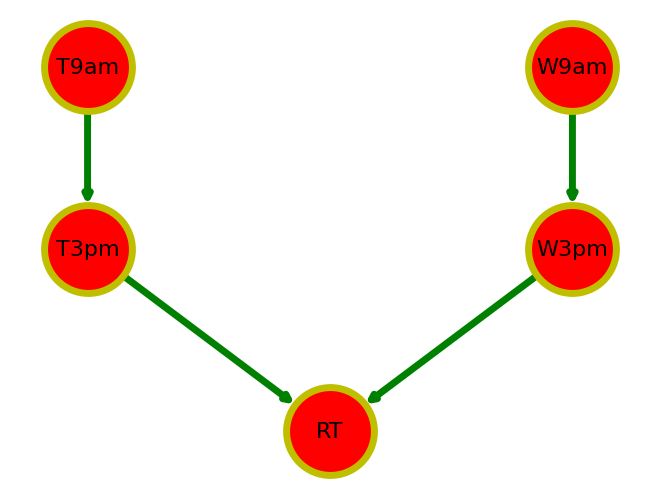

In [55]:
# Set node positions
pos = {0: (-1, 2), 1: (-1, 0.5), 2: (1, 2), 3: (1, 0.5), 4: (0, -1)}

# Set options for graph looks
options = {
    "font_size": 16,
    "node_size": 4000,
    "node_color": "r",
    "edgecolors": "y",
    "edge_color": "g",
    "linewidths": 5,
    "width": 5,}
n, d = bbn.to_nx_graph()
nx.draw(n, with_labels=True, labels=d, pos=pos, **options)
ax = plt.gca()
ax.margins(0.10)
plt.axis("off")
plt.show()

In [56]:
def print_probs():
    for node in join_tree.get_bbn_nodes():
        potential = join_tree.get_bbn_potential(node)
        print("Node:", node)
        print("Values:")
        print('the value of potential',potential)
print_probs()

Node: 3|W3pm|<15,>=15
Values:
the value of potential 3=<15|0.31934
3=>=15|0.68066
Node: 2|W9am|<16,>=16
Values:
the value of potential 2=<16|0.61013
2=>=16|0.38987
Node: 1|T3pm|<24,24-36,>26
Values:
the value of potential 1=<24|0.62636
1=24-36|0.32452
1=>26|0.04911
Node: 0|T9am|<15,15-26,>26
Values:
the value of potential 0=<15|0.39486
0=15-26|0.49902
0=>26|0.10613
Node: 4|RT|No,Yes
Values:
the value of potential 4=No|0.77580
4=Yes|0.22420


In [57]:
def evidence(ev, nod, cat, val):
    ev = EvidenceBuilder() \
    .with_node(join_tree.get_bbn_node_by_name(nod)) \
    .with_evidence(cat, val) \
    .build()
    join_tree.set_observation(ev)
    
evidence('ev1', 'T9am', '>26', 1.0)
print_probs()

Node: 3|W3pm|<15,>=15
Values:
the value of potential 3=<15|0.31934
3=>=15|0.68066
Node: 2|W9am|<16,>=16
Values:
the value of potential 2=<16|0.61013
2=>=16|0.38987
Node: 1|T3pm|<24,24-36,>26
Values:
the value of potential 1=<24|0.04411
1=24-36|0.66328
1=>26|0.29261
Node: 0|T9am|<15,15-26,>26
Values:
the value of potential 0=<15|0.00000
0=15-26|0.00000
0=>26|1.00000
Node: 4|RT|No,Yes
Values:
the value of potential 4=No|0.84061
4=Yes|0.15939


In [58]:
evidence('ev1', 'T9am', '>26', 1.0)



In [59]:
evidence('ev2', 'T9am', '15-26', 1.0)
print_probs()

Node: 3|W3pm|<15,>=15
Values:
the value of potential 3=<15|0.31934
3=>=15|0.68066
Node: 2|W9am|<16,>=16
Values:
the value of potential 2=<16|0.61013
2=>=16|0.38987
Node: 1|T3pm|<24,24-36,>26
Values:
the value of potential 1=<24|0.48281
1=24-36|0.48976
1=>26|0.02743
Node: 0|T9am|<15,15-26,>26
Values:
the value of potential 0=<15|0.00000
0=15-26|1.00000
0=>26|0.00000
Node: 4|RT|No,Yes
Values:
the value of potential 4=No|0.79227
4=Yes|0.20773


In [60]:
evidence('ev2', 'T9am', '15-26', 1.0)


In [61]:
evidence('ev2', 'T9am', '15-26', 1.0)
evidence('ev3', 'T3pm', '>26', 1.0)
print_probs()

Node: 3|W3pm|<15,>=15
Values:
the value of potential 3=<15|0.31934
3=>=15|0.68066
Node: 2|W9am|<16,>=16
Values:
the value of potential 2=<16|0.61013
2=>=16|0.38987
Node: 1|T3pm|<24,24-36,>26
Values:
the value of potential 1=<24|0.00000
1=24-36|0.00000
1=>26|1.00000
Node: 0|T9am|<15,15-26,>26
Values:
the value of potential 0=<15|0.00000
0=15-26|1.00000
0=>26|0.00000
Node: 4|RT|No,Yes
Values:
the value of potential 4=No|0.84138
4=Yes|0.15862


In [62]:
evidence('ev3', 'T3pm', '>26', 1.0)


In [63]:
evidence('ev3', 'T3pm', '>26', 1.0)
evidence('ev4', 'T3pm', '<24', 1.0)
print_probs()

Node: 3|W3pm|<15,>=15
Values:
the value of potential 3=<15|0.31934
3=>=15|0.68066
Node: 2|W9am|<16,>=16
Values:
the value of potential 2=<16|0.61013
2=>=16|0.38987
Node: 1|T3pm|<24,24-36,>26
Values:
the value of potential 1=<24|1.00000
1=24-36|0.00000
1=>26|0.00000
Node: 0|T9am|<15,15-26,>26
Values:
the value of potential 0=<15|0.00000
0=15-26|1.00000
0=>26|0.00000
Node: 4|RT|No,Yes
Values:
the value of potential 4=No|0.73356
4=Yes|0.26644


In [64]:
evidence('ev4', 'T3pm', '<24', 1.0)

In [65]:
evidence('ev5', 'W9am', '<16', 1.0)
print_probs()

Node: 3|W3pm|<15,>=15
Values:
the value of potential 3=<15|0.43071
3=>=15|0.56929
Node: 2|W9am|<16,>=16
Values:
the value of potential 2=<16|1.00000
2=>=16|0.00000
Node: 1|T3pm|<24,24-36,>26
Values:
the value of potential 1=<24|0.48281
1=24-36|0.48976
1=>26|0.02743
Node: 0|T9am|<15,15-26,>26
Values:
the value of potential 0=<15|0.00000
0=15-26|1.00000
0=>26|0.00000
Node: 4|RT|No,Yes
Values:
the value of potential 4=No|0.79667
4=Yes|0.20333


In [66]:
evidence('ev5', 'W9am', '<16', 1.0)

In [67]:
evidence('ev6', 'W3pm', '>=15', 1.0)
print_probs()

Node: 3|W3pm|<15,>=15
Values:
the value of potential 3=<15|0.00000
3=>=15|1.00000
Node: 2|W9am|<16,>=16
Values:
the value of potential 2=<16|0.51030
2=>=16|0.48970
Node: 1|T3pm|<24,24-36,>26
Values:
the value of potential 1=<24|0.48281
1=24-36|0.48976
1=>26|0.02743
Node: 0|T9am|<15,15-26,>26
Values:
the value of potential 0=<15|0.00000
0=15-26|1.00000
0=>26|0.00000
Node: 4|RT|No,Yes
Values:
the value of potential 4=No|0.77966
4=Yes|0.22034


In [68]:
evidence('ev6', 'W3pm', '>=15', 1.0)